## Accessing Datasets

### Trial1

In [1]:
import numpy as np

In [2]:
import os
from matplotlib import pyplot as plt
from PIL import Image
folder_path = '/Dataset'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('png', 'jpg', 'jpeg'))]


In [3]:
for image_file in image_files:
    print(image_file)
    # do something with the image_file

000.png
001.png
002.png
003.png
004.png
005.png
006.png
007.png
008.png
009.png
010.png
011.png
012.png
013.png
014.png
015.png
016.png
017.png
018.png


### Image Processing

In [4]:
image_list = []
for image_file in image_files:
    print(image_file)

    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)
    # Converting image to array
    img = np.asarray(image)
    
    image_list.append(img)

000.png
001.png
002.png
003.png
004.png
005.png
006.png
007.png
008.png
009.png
010.png
011.png
012.png
013.png
014.png
015.png
016.png
017.png
018.png


In [5]:
# Accessing the unique elements of the first image
np.unique(image_list[0])

array([  0,   8,  16,  24,  32,  40,  48,  56,  64, 128, 152, 160, 162,
       224, 240, 248, 255], dtype=uint8)

In [6]:
# Understanding the shape of the image
image_list[0].shape

(800, 800, 4)

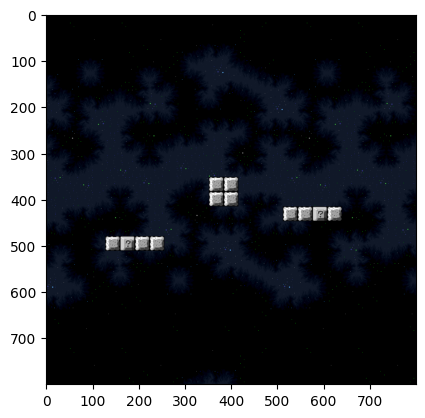

In [7]:
plt.imshow(image_list[0])

In [8]:
import cv2

# Load an image
image = cv2.imread('../Dataset/000.png')

# Draw a rectangle (for annotation)
# (x, y) is the top-left corner and (x+w, y+h) is the bottom-right corner
cv2.rectangle(image, (130, 510), (252, 480), (0, 255, 0), 2)
cv2.rectangle(image, (350, 350), (414, 414), (0, 255, 0), 2)
cv2.rectangle(image, (514, 417), (640, 445), (0, 255, 0), 2)

# Save or display the annotated image
cv2.imshow('Annotated Image', image)
cv2.waitKey(0)  # Press any key to close the window
cv2.destroyAllWindows()

# Optionally, save the annotated image
cv2.imwrite('./GAN/anotated/image_000.png', image)

output_dir = './annotated/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the annotated image
output_path = os.path.join(output_dir, 'image_000.png')
cv2.imwrite(output_path, image)


True

In [8]:
import cv2
import os

def annotate_blocks(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load {image_path}")
        return
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve contour detection
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    
    blurred = cv2.GaussianBlur(thresh, (5, 5), 0)

    # Use Canny edge detection to detect edges
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop over the contours and draw rectangles around them
    for contour in contours:
        # Get the bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)
        # Draw a rectangle around the block
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Save the annotated image
    cv2.imwrite('./GAN/anotated/image_003.png', image)

    output_dir = './annotated/'

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save the annotated image
    output_path = os.path.join(output_dir, output_path)
    cv2.imwrite(output_path, image)



In [9]:
# Example usage
input_image_path = '../Dataset/002.png'
output_image_path = './image_002.png'

annotate_blocks(input_image_path, output_image_path)


In [10]:
# Creating a list of image files
for image_file in image_files:
    # print(image_file)
    input_image_path = os.path.join(folder_path, image_file)
    output_image_path = f'./annotated_image_{image_file}'
    annotate_blocks(input_image_path, output_image_path)
    

### Creating The Model

In [12]:
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Reshape, Flatten, Input, BatchNormalization, LeakyReLU, UpSampling2D, Conv2D
import numpy as np
import matplotlib.pyplot as plt
latent_dim = 100

#### Generator

In [13]:
def build_generator(latent_dim):
    model = tf.keras.Sequential()

    # Fully connected layer to reshape the input noise
    model.add(layers.Dense(50 * 50 * 256, input_dim=latent_dim))  # 50x50 to accommodate further upscaling
    model.add(layers.Reshape((50, 50, 256)))

    # Upsampling layers to increase the image size to 800x800
    model.add(layers.Conv2DTranspose(128, kernel_size=4, strides=4, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    model.add(layers.Conv2DTranspose(64, kernel_size=4, strides=4, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    model.add(layers.Conv2DTranspose(4, kernel_size=3, strides=2, padding='same', activation='tanh'))  
    model.add(layers.MaxPooling2D(2)) # Output layer

    return model


In [14]:
gen_model = build_generator(latent_dim)

g:\GAN\base\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
g:\GAN\base\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [15]:
gen_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 640000)         │    64,640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 50, 50, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 200, 200, 128)  │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 200, 200, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 800, 800, 64)   │       131,136 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 800, 800, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 1600, 1600, 4)  │         2,308 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 800, 800, 4)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,297,860 (249.09 MB)

 Trainable params: 65,297,860 (249.09 MB)

 Non-trainable params: 0 (0.00 B)

#### Discriminator

In [16]:
def build_discriminator(input_shape=(800, 800, 4)):
    model = tf.keras.Sequential()

    # Convolutional layers to process the image
    model.add(layers.Conv2D(64, kernel_size=3, strides=2, input_shape=input_shape, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, kernel_size=3, strides=2, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, kernel_size=3, strides=2, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer

    return model


In [17]:
dis_model = build_discriminator()

g:\GAN\base\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
dis_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 400, 400, 64)   │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 400, 400, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400, 400, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 200, 200, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 200, 200, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200, 200, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 100, 100, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 100, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2560000)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │     2,560,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,931,393 (11.18 MB)

 Trainable params: 2,931,393 (11.18 MB)

 Non-trainable params: 0 (0.00 B)

### Final Working Code

To get a different model for specific data, change the input data. Also, only use images with a size below 256 to get good results. Remember to adjust the batch size as well, so you don’t run out of resources.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
from PIL import Image
import glob

# Custom Dataset Class
class CustomImageDataset:
    def __init__(self, image_dir, image_size):
        self.image_paths = glob.glob(os.path.join(image_dir, "*"))
        self.image_size = image_size

    def load_image(self, img_path):
        image = Image.open(img_path).convert('RGB')  # Convert to RGB
        image = image.resize((self.image_size, self.image_size))  # Resize to desired size
        image = np.array(image, dtype=np.float32)  # Convert to float32 for TensorFlow compatibility
        image = (image - 127.5) / 127.5  # Normalize to [-1, 1]
        return image

    def get_dataset(self):
        dataset = tf.data.Dataset.from_tensor_slices(self.image_paths)
        dataset = dataset.map(
            lambda x: tf.numpy_function(self.load_image, [x], [tf.float32]),
            num_parallel_calls=tf.data.experimental.AUTOTUNE,
        )
        dataset = dataset.cache()  # Cache dataset for efficiency
        dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)  # Prefetch
        return dataset

# Generator Model
def build_generator(latent_dim, img_size, channels):
    init_size = img_size // 4

    model = tf.keras.Sequential([
        Input(shape=(latent_dim,)),
        layers.Dense(256 * init_size * init_size, activation="relu"),
        layers.Reshape((init_size, init_size, 256)),
        layers.BatchNormalization(),
        layers.UpSampling2D(),
        layers.Conv2D(128, kernel_size=3, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.UpSampling2D(),
        layers.Conv2D(64, kernel_size=3, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(channels, kernel_size=3, padding="same"),
        layers.Activation("tanh")
    ])

    return model

# Discriminator Model
def build_discriminator(img_size, channels):
    model = tf.keras.Sequential([
        Input(shape=(img_size, img_size, channels)),
        layers.Conv2D(16, kernel_size=3, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Dropout(0.25),
        layers.Conv2D(32, kernel_size=3, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Dropout(0.25),
        layers.Conv2D(64, kernel_size=3, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Dropout(0.25),
        layers.Conv2D(128, kernel_size=3, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])

    return model

# Loss function and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

# Training step
def train_step(generator, discriminator, images, latent_dim, batch_size, optimizer_G, optimizer_D):
    noise = tf.random.normal([batch_size, latent_dim])

    # Train Generator
    with tf.GradientTape() as tape_G:
        generated_images = generator(noise)
        fake_output = discriminator(generated_images)
        g_loss = generator_loss(fake_output)

    gradients_of_generator = tape_G.gradient(g_loss, generator.trainable_variables)
    optimizer_G.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    # Train Discriminator
    with tf.GradientTape() as tape_D:
        real_output = discriminator(images)
        fake_output = discriminator(generated_images)
        d_loss = discriminator_loss(real_output, fake_output)

    gradients_of_discriminator = tape_D.gradient(d_loss, discriminator.trainable_variables)
    optimizer_D.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return g_loss, d_loss

# Training function
def train(generator, discriminator, dataset, latent_dim, epochs, batch_size, device):
    optimizer_G = Adam(learning_rate=0.0002, beta_1=0.5)
    optimizer_D = Adam(learning_rate=0.0002, beta_1=0.5)

    step = 0
    g_losses, d_losses = [], []
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        for batch_num, images in enumerate(dataset):
            step += 1
            g_loss, d_loss = train_step(generator, discriminator, images, latent_dim, batch_size, optimizer_G, optimizer_D)
            g_losses.append(g_loss)
            d_losses.append(d_loss)

            # Print losses every 100 steps
            if step % 100 == 0:
                print(f"  Step {step} - Generator Loss: {g_loss.numpy():.4f}, Discriminator Loss: {d_loss.numpy():.4f}")

            # Generate and save images every 500 steps
            if step % 500 == 0:
                generate_and_save_images(generator, latent_dim, step)

        # Print average losses for the entire epoch
        print(f"Epoch {epoch+1}/{epochs} - Avg Generator Loss: {np.mean(g_losses):.4f}, Avg Discriminator Loss: {np.mean(d_losses):.4f}")

    return g_losses, d_losses

# Generate and Save Images
def generate_and_save_images(generator, latent_dim, step):
    noise = tf.random.normal([10, latent_dim])
    generated_images = generator(noise)

    generated_images = (generated_images + 1) / 2  # Rescale to [0, 1]
    for i in range(generated_images.shape[0]):
        img = generated_images[i].numpy()
        tf.keras.preprocessing.image.save_img(f"./new_images_folder/step_{step}_img_{i}.png", img)
    print(f"Images saved for step {step}.")

# Main script
image_dir = './data'
latent_dim = 100
image_size = 256
batch_size = 32

# Create Dataset
custom_dataset = CustomImageDataset(image_dir, image_size)
dataset = custom_dataset.get_dataset().batch(batch_size)

# Initialize Generator and Discriminator
generator = build_generator(latent_dim, image_size, 3)
discriminator = build_discriminator(image_size, 3)

# Ensure directory for generated images
if not os.path.exists('new_images_folder'):
    os.makedirs('new_images_folder')

# Train the DCGAN
g_losses, d_losses = train(generator, discriminator, dataset, latent_dim, epochs=10000, batch_size=batch_size, device='cpu')

# Generate a final set of images
generate_and_save_images(generator, latent_dim, 'final')


In [ ]:
import matplotlib.pyplot as plt
def plot_losses(g_losses, d_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(g_losses, label="Generator Loss", color='blue')
    plt.plot(d_losses, label="Discriminator Loss", color='red')
    plt.title("Generator and Discriminator Loss Over Time")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
plot_losses(g_losses, d_losses)

In [ ]:
# Save the trained generator model
generator.save('./saved_generator_model.h5')
print("Generator model saved successfully.")

### Open CV for object detection

In [38]:
import cv2
import os

def annotate_blocks(image_path, output_path, resize_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load {image_path}")
        return
    
    new_width = 800
    new_height = 800
    image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(resize_path, image)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve contour detection
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    
    blurred = cv2.GaussianBlur(thresh, (5, 5), 0)

    # Use Canny edge detection to detect edges
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    block_positions = []

    # Loop over the contours and draw rectangles around them
    for contour in contours:
        # Get the bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)
        # Draw a rectangle around the block
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Save the block's position (top-left corner and dimensions)
        block_positions.append((x, y, w, h))

    output_dir = './'

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save the annotated image
    output_path = os.path.join(output_dir, output_path)
    cv2.imwrite(output_path, image)

    return block_positions

image_path = './generated_images/generated_img_1.png'
resize_path = './resized_images/resized_img_1.png'
output_path = './annotated_generated/annotated_img_1.png'

block_positions = annotate_blocks(image_path, output_path, resize_path)

In [39]:
block_positions

[(132, 503, 3, 5),
 (163, 502, 4, 4),
 (227, 495, 4, 11),
 (195, 495, 4, 13),
 (228, 485, 4, 5),
 (196, 484, 5, 4),
 (140, 483, 4, 4),
 (131, 483, 5, 17),
 (548, 440, 4, 4),
 (579, 439, 4, 5),
 (515, 439, 5, 5),
 (612, 438, 4, 5),
 (524, 421, 7, 2),
 (515, 420, 6, 15),
 (611, 419, 15, 18),
 (579, 419, 4, 4),
 (547, 419, 16, 20),
 (524, 419, 7, 1),
 (388, 408, 4, 4),
 (355, 407, 4, 5),
 (355, 397, 5, 9),
 (356, 388, 4, 4),
 (387, 387, 19, 15),
 (365, 387, 4, 4),
 (356, 369, 4, 7),
 (387, 367, 5, 13),
 (388, 357, 5, 9),
 (357, 356, 4, 5),
 (396, 355, 4, 4),
 (365, 355, 4, 4)]

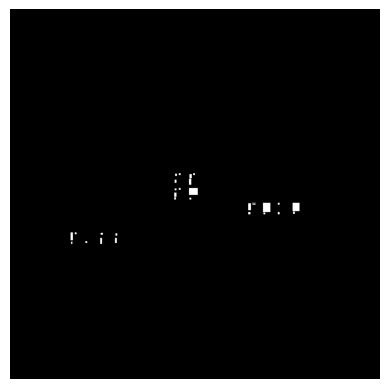

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def create_filled_images(original_image, block_positions, fill_color=(255, 255, 255)):
        
    # Create a copy of the image
    new_image = np.zeros_like(original_image)
    
    # Ensure the fill_color matches the image's channel count
    if new_image.ndim == 3 and new_image.shape[2] != len(fill_color):
        raise ValueError(f"Fill color dimensions {len(fill_color)} do not match image channels {new_image.shape[2]}")

    # Fill the blocks in the image with the specified color
    for x, y, w, h in block_positions:
        new_image[y:y+h, x:x+w] = fill_color

    return new_image

# Load the original image
image_path = './annotated_generated/annotated_img_1.png'
plt.imshow(create_filled_images(cv2.imread(image_path), block_positions))
plt.axis('off')
plt.show()